# Phys 512: Final Exam

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.interpolate import interp1d
import scipy.linalg

## Question 1: 

### a)

In [119]:
# define numerical derivative using complex variables
def deriv(func, x, h):
    return np.imag(func(x + h*1j)) / h

### b)

In [120]:
# define numerical derivative using central finite differencing
def CFDderiv(func, x, h):
    return (func(x+h) - func(x-h))/(2*h)

In [121]:
# define sin^3(x) and its analytic derivative 
def sin3(x):
    return np.sin(x)**3

def AnalyticDerivative(x):
    return 3 * np.sin(x)**2 * np.cos(x)

In [122]:
# create a logarithmically spaced array of step sizes h from 1e-10 to 1
h_values = np.logspace(-10, 0, 1000)

# compute the analytic derivative at x=1.5 for comparison
soln = AnalyticDerivative(1.5)

# compute both numerical derivatives at x=1.5 for all values of h
dfdx_complex = deriv(sin3, 1.5, h_values)
dfdx_CFD= CFDderiv(sin3, 1.5, h_values)

# compute the relative error between the analytic and numerical derivatives
err_complex = abs(dfdx_complex - soln)/soln
err_CFD = abs(dfdx_CFD - soln)/soln

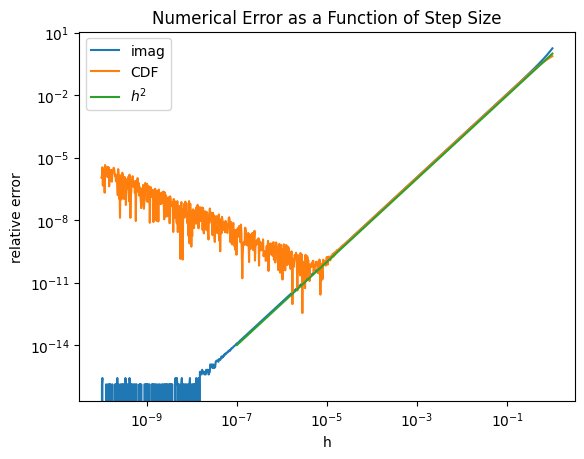

In [139]:
# plot relative error as a function of h
plt.plot(h_values, err_complex , label='imag')
plt.plot(h_values, err_CFD, label='CDF')
plt.plot(h_values[300:], h_values[300:]**2, label='$h^2$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('relative error')
plt.title('Numerical Error as a Function of Step Size')
plt.legend()

At sufficiently large values of $h$, the primary source of error for both methods is truncation error. Error therefore decreases as $h$ decreases. In both methods, error scales with $h^2$ in this region. However, for small enough $h$, rounding error begins to dominitate. In the case of the central finite differencing method, this happens when the subraction $func(x+h) - func(x-h)$ yeilds a value below the rounding cutoff of $10^{-16}$. This happends at roughly $10^{-5}$. As $h$ continues to decrease, round off error accumulates and the total relative error of the numerical derivative increases as $h$ decreases. The complex variable method is adventageous because it does not utalize the subtraction of two close numbers. Therefore, roundoff error only becomes a dominating source of error when the truncation error becomes less than the rounding cutoff of $10^{-16}$. At this point error is capped and fluctates around $10^{-16}$ as $h$ decreases.

## Question 2: 

#### The time independant Schrodinger equation gives a particle's wave function as:
$$ -\frac{\hbar^2}{2m}\frac{\partial^2 f}{\partial x^2} + V(x)f = Ef$$

#### By finite differencing the second derivative term, we obtain:
$$ -\frac{\hbar^2}{2m}\frac{f_{i-1} - 2f_i + f_{i+1}}{(\Delta x)^2} + V_if_i = Ef_i$$

#### This is of the form $\mathbf{Hf} = E\mathbf{f}$ where $\mathbf{H}$ is the matrix given by:
\begin{array}{c|c}
H  = 
-\frac{\hbar^2}{2m}
\begin{bmatrix} 
-2 & 1 & 0 & \dots & 0 \\
1 & -2 & 1 & \dots & 0 \\
0 & 1 & -2  & \dots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 &  & -2 \\
\end{bmatrix} + 
\begin{bmatrix} 
V_1 & 0 & 0 & \dots & 0 \\
0 & V_2 & 0 & \dots & 0 \\
0 & 0 & V_3  & \dots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 &  & V_f \\
\end{bmatrix}
\end{array}
#### The solutions to the time independant Schrodinger equation are therefore given by the eigan functions and energies of $\mathbf{H}$. Note that the above assumes clamped boundary conditions at the initial and final positions. This is valid on the interval $(-\infty<x<\infty)$ since the wavefunction will decay to 0 in the classically forbidden region. However, we can apply this approximation on a sufficiently large interval of x for the first few eigan functions since they have lesser eigan energies and therefore decay sooner.

In [140]:
# define potential function
def Potential(x):
    return -np.exp(-np.sqrt(abs(x)))

In [141]:
# set physical constants to 1 for simplicity
hbar=1
m=1

# define grid of position values
x_min = -50
x_max = 50
N = 3200

x, dx = np.linspace(x_min, x_max, N, retstep=True)

In [142]:
# Define matrix H

T = np.zeros((N-2, N-2))
for i in range(N-2):
    T[i][i] = -2   
    if i >= 1:
        T[i][i - 1] = 1
    if i < N-3:
        T[i][i + 1] = 1
T *= -hbar**2 / (2 * m * dx**2)

V = np.zeros((N-2, N-2))
for i in range(N-2):
    V[i][i] = Potential(x[i+1])
    
H = T + V

In [143]:
# Solve H for the eigan energies/functions
E, f = scipy.linalg.eigh(H)

# Append the clamped boundary conditions to the first and last position of each eigan vector
first_last = np.zeros((1, len(E)))
f = np.vstack((first_last, f, first_last))

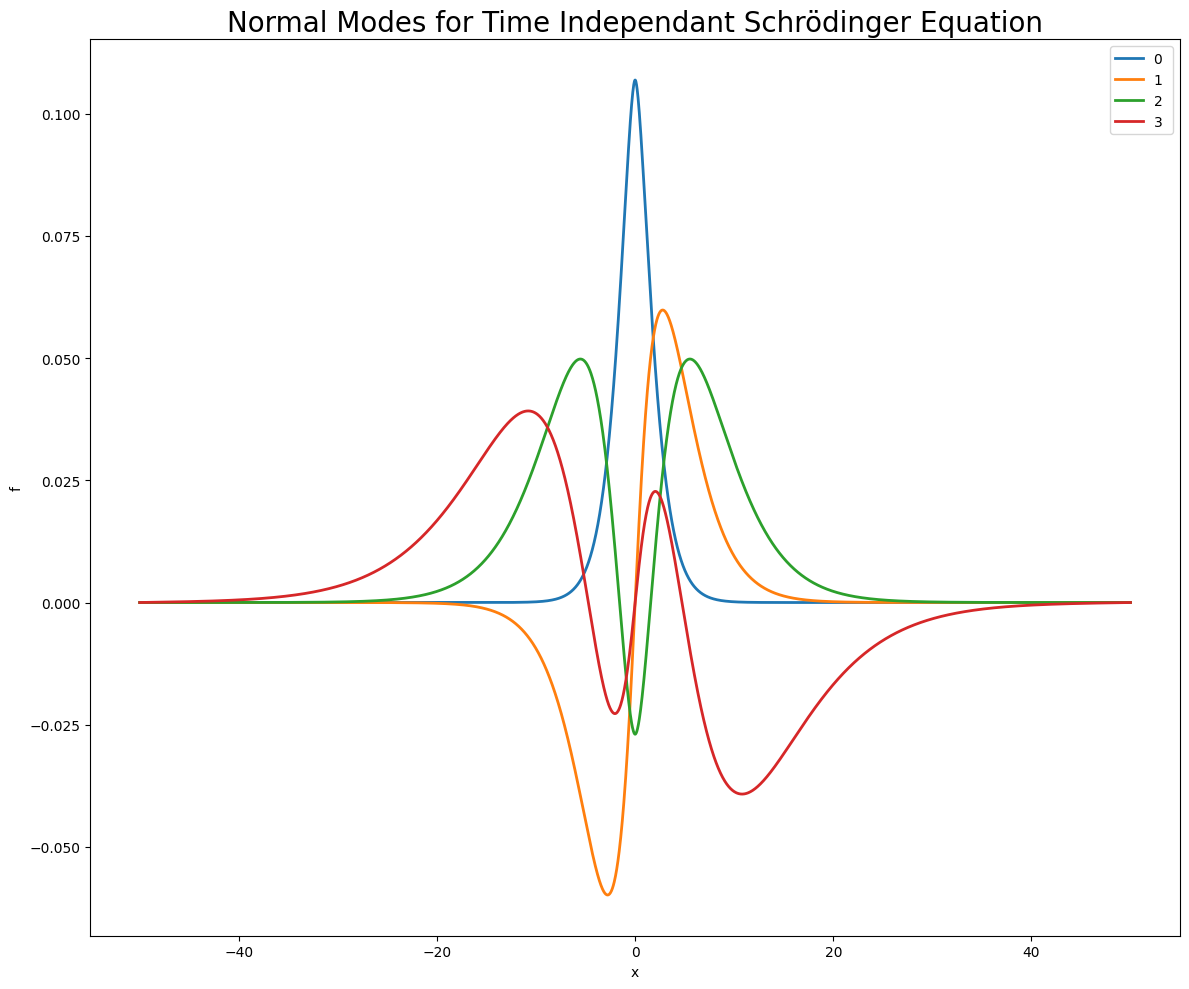

In [144]:
# Plot first four normal modes 
plt.figure(figsize=(12,10))
plt.title('Normal Modes for Time Independant Schrödinger Equation', fontsize=20, y=1)
for i in range(4):
    plt.plot(x, f[:, i], lw=2, label="{} ".format(i))
    plt.xlabel('x')
    plt.ylabel('f')
    
plt.tight_layout()
plt.legend()
plt.show()

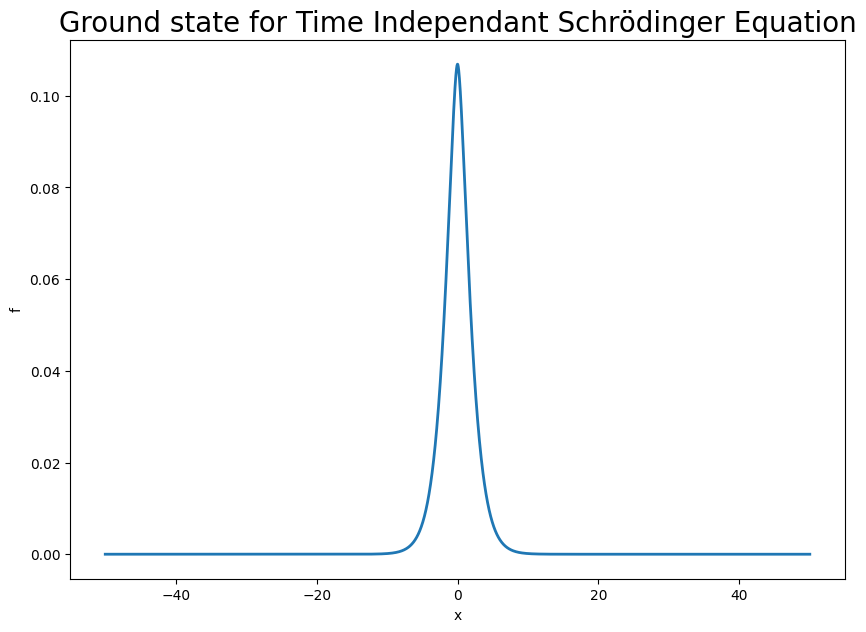

 Numerical ground state energy = -0.35697068802487597


In [145]:
# Plot ground state alone
plt.figure(figsize=(10,7))
plt.title('Ground state for Time Independant Schrödinger Equation', fontsize=20, y=1)
plt.plot(x, f[:, 0], lw=2)
plt.xlabel('x')
plt.ylabel('f')   
plt.show()

# print ground state engergy
print(f" Numerical ground state energy = {E[0]}")   

The ground state clearly decays well within the interval $(-50<x<50)$. I will therefore assume the dominating source of error to be truncation error from finite differencing. Error associated with central finite differencing scales with $(\Delta x)^2$. For an error of ~$10^{-3}$, I therefore need a stepsizes of $\Delta x$ ~ $10^{-3/2} = 0.03$, which is comparable to my current stepsize $(100/3200)$. That said, this is a rough error estimate, neglecting any scaling factors. For a better error analysis, I will examin how the eigan energy of the ground state converges to its most accurate value as we approach the optimal step size. 

In [146]:
# define a range of step points
N_values = [50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]  # Different grid sizes
ground_states = []

# Calculate and record the groud state energy for each number of points
for N in N_values:
    
    x, dx = np.linspace(x_min, x_max, N, retstep=True) # define grid of position values
    
    # define matrix H
    T = np.zeros((N-2, N-2))
    for i in range(N-2):
        T[i][i] = -2   
        if i >= 1:
            T[i][i - 1] = 1
        if i < N-3:
            T[i][i + 1] = 1
    T *= -hbar**2 / (2 * m * dx**2)

    V = np.zeros((N-2, N-2))
    for i in range(N-2):
        V[i][i] = Potential(x[i+1])

    H = T + V
    
    E, f = scipy.linalg.eigh(H) # Solve H for the eigan energies
    ground_states.append(E[0]) # Record ground state energy
    
    # Print the numerical estimate of ground state energy
    print(f" N = {N}: Ground state energy = {E[0]}")   

 N = 50: Ground state energy = -0.2893264011938617
 N = 100: Ground state energy = -0.32953663604930106
 N = 200: Ground state energy = -0.34614953498242507
 N = 400: Ground state energy = -0.3528739497232287
 N = 800: Ground state energy = -0.35554836085596264
 N = 1600: Ground state energy = -0.35658163863835146
 N = 3200: Ground state energy = -0.35697068802487597
 N = 6400: Ground state energy = -0.3571143983795441
 N = 12800: Ground state energy = -0.35716677794364565


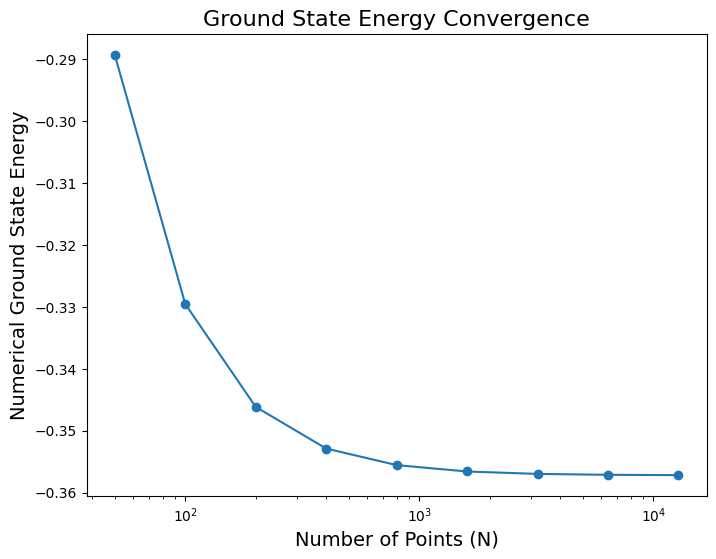

In [147]:
# plot ground state energies
plt.figure(figsize=(8, 6))
plt.plot(N_values, ground_states, marker='o')
plt.xscale('log')
plt.xlabel('Number of Points (N)', size=14)
plt.ylabel('Numerical Ground State Energy', size=14)
plt.title('Ground State Energy Convergence', size=16)
plt.show()

In [148]:
# calculate relative error between step counts
for i in range(len(ground_states)-1):
    rel_change = (ground_states[i+1] - ground_states[i])/ground_states[i]
    print(f" N = {N_values[i+1]}: Relative error between current and previous number of points {rel_change}")   

 N = 100: Relative error between current and previous number of points 0.13897879588422585
 N = 200: Relative error between current and previous number of points 0.05041290441114596
 N = 400: Relative error between current and previous number of points 0.019426328974109612
 N = 800: Relative error between current and previous number of points 0.007578941814298154
 N = 1600: Relative error between current and previous number of points 0.002906152569234918
 N = 3200: Relative error between current and previous number of points 0.0010910527754882154
 N = 6400: Relative error between current and previous number of points 0.0004025830677115222
 N = 12800: Relative error between current and previous number of points 0.00014667446717134356


As shown above, when I go from 1600 to 3200 grid points, the ground state energy changes by a factor of $10^{-3}$. After 3200 grid points, the addition of more grid points results in changes in ground state engergy that are orders of magnitude less than $10^{-3}$. Therefore, my original grid size of 3200 points does yeild results accurate within approximately 1 part in 1000. 

## Question 3: 

#### The 1D diffusion equation is given by: 
$$ \frac{\partial T}{\partial t} = \kappa \frac{\partial^2T}{\partial x^2}$$

#### We obtain a system of coupled ODEs representing the time derivative at each position by finite differencing right hand side of the above equation:
$$ \frac{\partial T_i}{\partial t} = \kappa_i \frac{T_{i-1} - 2T_i + T_{i+1}}{(\Delta x)^2}$$

#### Each temperature is therefore given by:
$$T^{n+1}_i = T^n_i + \kappa_i \Delta t \left( {T^{n+1}_{i+1}-2T^{n+1}_i+T^{n+1}_{i-1}\over (\Delta x)^2} \right), $$

#### We define $\alpha_i = \frac{\kappa_i \Delta t}{(\Delta x)^2}$. Rearranging gives:
$$-\alpha_i T^{n+1}_{i-1} + (1+2\alpha_i) T^{n+1}_i -\alpha_i T^{n+1}_{i+1} = T^n_i.$$

#### Applying an insulated boundary at x=0 and a clamped boundary at x=1, we obtain the temperature vector at a given time n:



\begin{array}{c|c}
\begin{bmatrix}
    T_1 \\
    T_2 \\
    T_3 \\
    \vdots \\
    T_f \\
\end{bmatrix}^{n} \hspace{1cm} = \hspace{1cm}
\begin{bmatrix} 
1+\alpha_1 & -\alpha_1 & 0 & \dots & 0 \\
-\alpha_2 & 1+2\alpha_2 & -\alpha_2 & \dots & 0 \\
0 & -\alpha_3 & 1+2\alpha_3  & \dots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 &  & 1+2\alpha_f \\
\end{bmatrix} 
\begin{bmatrix}
    T_1 \\
    T_2 \\
    T_3 \\
    \vdots \\
    T_f \\
\end{bmatrix}^{n+1} \hspace{1cm}
\end{array}

#### Given $\mathbf{T^n}$, we will solve for $\mathbf{T^{n+1}}$ using scipy.linalg.solve_banded.

In [133]:
# import thermal dissfussivity data and interpolate to obtain thermal diffusivity for all heights
os.chdir('/Users/emiliavlahos/Desktop/Phys 512/Phys512Assignments')
height, thermal_diffusivity = np.loadtxt('final_data.txt', unpack=True)

interp_diffusivity = interp1d(height, thermal_diffusivity, kind='cubic')

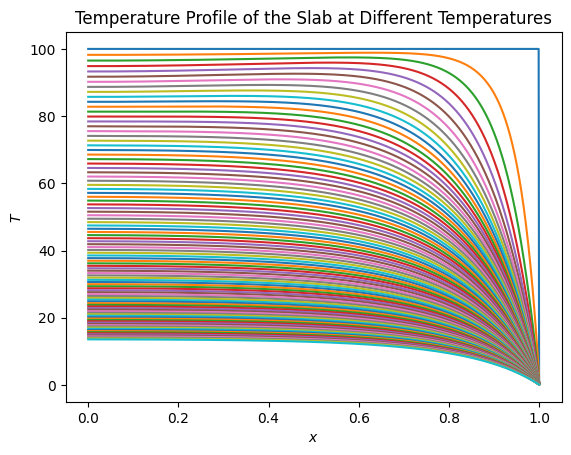

The temperature at the base of the slab at t = 1 second is 13.557722670157908 K


In [134]:
# Note that some of this code is taken from the solution to the insulated boundary condition exercise done in class

# divide x into a grid of 1000 points and obtain the thermal diffusivity at each point
n = 1000
x = np.linspace(0, 1, n)
k = interp_diffusivity(x)

# Initial profile has T=100 everywhere except T=0 at the outer boundary
T = 100*np.ones(n)
T[-1] = 0.0

# Plot initial temperature as a function of x
plt.plot(x, T)
plt.xlabel(r'$x$')
plt.ylabel(r'$T$')
plt.title('Temperature Profile of the Slab at Different Temperatures')

# Cacluate alpha at each point based on time and position stepsize
dx = x[1]-x[0]
dt = 1e-2
alpha = dt * k/dx**2

# select step count corresponding to 1 second
tf = 1
nsteps = int(tf/dt)

# Calculate the matrix A in banded form
b = (1 + 2*alpha) * np.ones(n)
b[0] = 1 + alpha[0] 
a = -alpha * np.ones(n)
c = -alpha * np.ones(n)
c[-1] = 0.0
a[0] = 0.0
AA = np.row_stack((a,b,c))

# iterate through timesteps, updating and plotting the temperature profile at each step
for i in range(1,nsteps):
    T = scipy.linalg.solve_banded((1,1), AA, T)
    plt.plot(x, T)
plt.show()

# Return the temperature at the base after 1s
print('The temperature at the base of the slab at t = 1 second is', T[0], 'K')

## Question 4: 

#### We can solve analytically for the number of atoms in an element as a function of time. We find:
$$ \frac{dN}{dt} = -\frac{N}{\tau}$$

$$ \int_{N_0}^{N(t)} \frac{dN}{N} = -\int_{0}^{t}\frac{dt}{\tau}$$

$$ N(t) = N_0 e^{-\frac{t}{\tau}} $$

#### I will normalize $N_0=1$ to study the scaling of decay with time. 

In [149]:
# Create array of timesteps
end_time = 1e6
npoints = 1000
t_arr = np.linspace(0, end_time, npoints)

# Create 100 elements with randomly generated decay timescales
num_elem = 100 
timescales = 10 ** np.random.uniform(3, 7, num_elem)

# Normalize intialize number of atoms per element to 1
N = 1 

In [150]:
# Track the number of atoms in each element at each timestep
N_atoms = np.zeros((npoints, num_elem)) 
for i in range(npoints):
    N_atoms[i] = N * np.exp(- t_arr[i] / timescales)

# Calculate the corresponding power released at each timestep    
power_released = np.sum(N_atoms / timescales, axis=1)

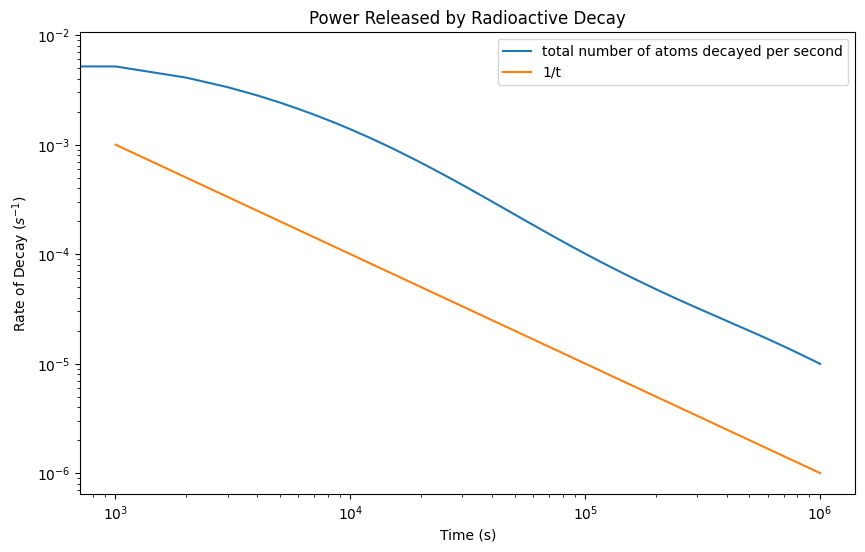

In [151]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_arr, power_released, label='total number of atoms decayed per second')
plt.plot(t_arr[1:], 1/t_arr[1:], label = '1/t')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time (s)')
plt.ylabel('Rate of Decay ($s^{-1}$)')
plt.title('Power Released by Radioactive Decay')
plt.legend()
plt.show()

Based on the plot above, the total energy released per second does infact decay proportional to $\frac{1}{t}$, as predictied by Li & Paczynski.

Well thats a wrap. Thank you for a great course :)))